In [11]:
import os
import sys

pkg_path = os.path.abspath('..')
sys.path.insert(0, pkg_path)

from pyolin.dataframe import GateData
from pyolin.analysis import similarity_heatmap
from pyolin.analysis import score_heatmap
from pyolin.analysis import compatibility_heatmap
from pyolin.analysis import filter_valid
from pyolin.analysis import score_table
from pyolin.analysis import similarity_table
from pyolin.analysis import compatibility_table
from pyolin.analysis import all_paths

from pyolin.gate import Gate

import matplotlib.pyplot as plt
plt.ioff()

import pandas
raw = pandas.read_csv('../cyto2func/standardised_cheeky.csv')
renamed = raw.rename(columns={'rrpu': 'decomp_flor'}).rename(columns={'newstandard': 'rrpu'})
data = GateData(renamed)

In [12]:
from pyolin.prediction import boundary_curves

1.588164693938249
1.0
1.5660993620824082
1.0
1.6206680718503206
1.0
1.6739255367234933
1.0
1.7110906695815005
1.0
1.6770506414771829
0.9999999999999999
1.1045993515779036
0.9999999999999999
1.088191806605558
1.0
1.0081847668430248
1.0
1.0001173566401285
1.0
1.0000652249320008
0.9999999999999999
1.0000241881257421
0.9999999999999999


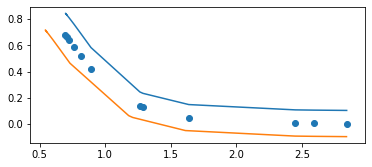

In [13]:
gate = data['CC118Lpir':'pSeva221':'Amer_f1']
ub, lb = boundary_curves(gate, 0.1)
fig, axes = plt.subplots()
axes.set_aspect('equal')
axes.plot([x for (x, y) in ub], [y for (x, y) in ub])
axes.plot([x for (x, y) in lb], [y for (x, y) in lb])
axes.scatter([x for (x, y) in ub], [gate.normalised_hill_function(x) for (x, y) in ub])

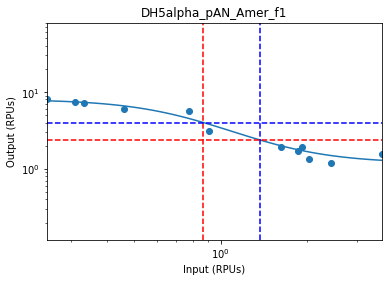

In [10]:
gate = data['DH5alpha':'pAN':'Amer_f1']
import numpy
gate.rpuplot();